# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [2]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

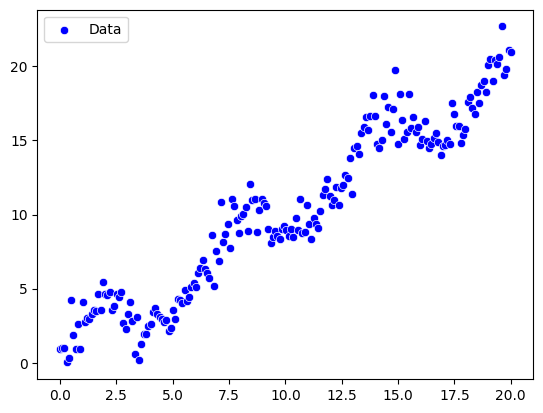

In [3]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [4]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [5]:
df = Simple1DRegressionDataset(X,y)


In [6]:
df[0]


(tensor([0.]), tensor([0.9015]))

In [7]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [8]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.3117]])]

In [155]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features) 
model_2=nn.Sequential(nn.Linear(in_features,64),
                    
                    nn.ReLU(),
                    nn.Linear(64,32),
                    nn.ReLU(),
                    nn.Linear(32,16),
                    nn.ReLU(),
                    nn.Linear(16,out_features))





In [156]:
loss_fn = nn.MSELoss()

In [157]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [158]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            # print(running_loss)



In [159]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [160]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs: 100%|██████████| 100/100 [00:33<00:00,  3.03it/s]


In [161]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

[[ 0.80723333]
 [ 0.93638515]
 [ 1.0697906 ]
 [ 1.2083166 ]
 [ 1.4525566 ]
 [ 1.701096  ]
 [ 1.9266148 ]
 [ 2.1348953 ]
 [ 2.3350246 ]
 [ 2.545886  ]
 [ 2.7555547 ]
 [ 2.9652233 ]
 [ 3.174892  ]
 [ 3.3845606 ]
 [ 3.5942292 ]
 [ 3.8038974 ]
 [ 3.9316928 ]
 [ 3.9973996 ]
 [ 4.0503864 ]
 [ 4.055419  ]
 [ 3.9669204 ]
 [ 3.878422  ]
 [ 3.7899237 ]
 [ 3.7014248 ]
 [ 3.6129267 ]
 [ 3.5244281 ]
 [ 3.4359298 ]
 [ 3.3474307 ]
 [ 3.258932  ]
 [ 3.1704335 ]
 [ 3.0819352 ]
 [ 2.9934373 ]
 [ 2.9049385 ]
 [ 2.8601782 ]
 [ 2.861111  ]
 [ 2.8620436 ]
 [ 2.8670785 ]
 [ 2.8759842 ]
 [ 2.885938  ]
 [ 2.8958914 ]
 [ 2.9058447 ]
 [ 2.9157984 ]
 [ 2.925752  ]
 [ 2.9357052 ]
 [ 2.9456592 ]
 [ 2.9556122 ]
 [ 2.9655662 ]
 [ 2.97552   ]
 [ 3.025721  ]
 [ 3.1884043 ]
 [ 3.3780558 ]
 [ 3.5807686 ]
 [ 3.8027682 ]
 [ 4.0278673 ]
 [ 4.253713  ]
 [ 4.479559  ]
 [ 4.7054734 ]
 [ 4.9469476 ]
 [ 5.193779  ]
 [ 5.440611  ]
 [ 5.6849003 ]
 [ 5.932019  ]
 [ 6.1656737 ]
 [ 6.3950753 ]
 [ 6.632098  ]
 [ 6.8760977 ]
 [ 7.12009

<Axes: >

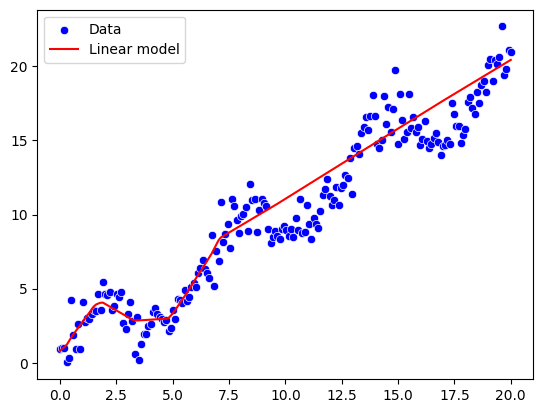

In [162]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
print(y_pred_m2)
print(y_pred_m2.shape)
print(X)
print(X.shape)

sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
